# 회귀 - 보스턴 주택 가격 예측
## 데이터 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()

housing.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

data : 데이터가 저장되어 있다. target : 분석하려는 종속변수가 저장되어 있다. feature_names : 피처의 이름들이 저장되어 있다.

In [4]:
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [5]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


*   CRIM : 자치시(town) 별 1인당 범죄율
*   ZN : 25,000 평방피트를 초과하는 거주지역의 비율
*   INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
*   CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
*   NOX : 10ppm 당 농축 일산화질소
*   RM : 주택 1가구당 평균 방의 개수
*   AGE : 1940년 이전에 건축된 소유주택의 비율
*   DIS : 5개의 보스턴 직업센터까지의 접근성 지수
*   RAD : 방사형 도로까지의 접근성 지수
*   TAX : 10,000 달러 당 재산세율
*   PTRATIO : 자치시(town)별 학생/교사 비율
*   B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
*   LSTAT : 모집단의 하위계층의 비율(%)

## 데이터 탐색
### 기본정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

모든 변수에 null값이 없는 것을 알 수 있다.

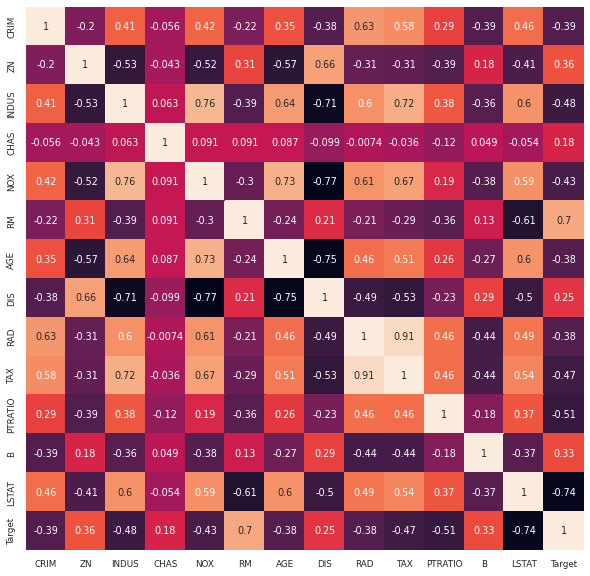

In [8]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

데이터간의 상관관계 파악하기 ( corr() 변수 간의 상관 관계를 알려줌 )

In [9]:
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
# 변수 간의 상관 관계 분석 - Target 변수와 상관 관계가 높은 순서대로 정리
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

Target과 상관 관계가 높은 순으로 정렬한다. ( LSTAT, RM이 강한 양의 상관 관계를 나타낸다. )

In [11]:
# 시각화로 분석할 피처 선택 추출 - Target 변수와 상관 관계가 높은 변수
plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


Target과 상관 관계가 높은 4개의 변수를 추려서 분석을 실시해본다.

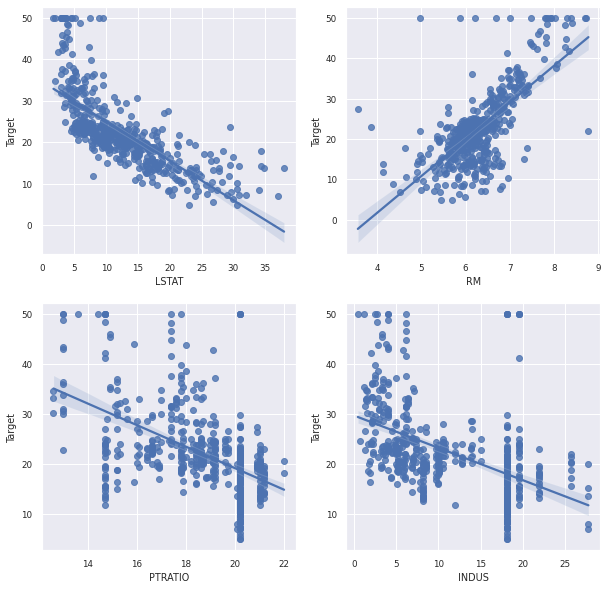

In [12]:
# regplot 으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2,2,idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

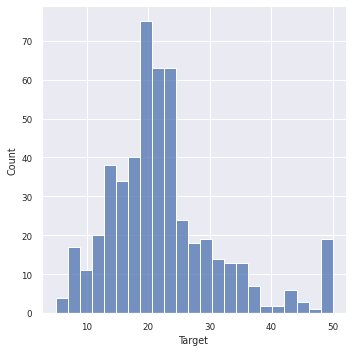

In [13]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()

Target이 20에 몰려 있는 형태이므로 이를 각 피처의 데이터 크기에 따른 상대적 영향력의 차이를 제거하기 위해, 피처의 크기를 비슷한 수준으로 맞춰주는 작업이 필요하다. ( 피처 스케일링, 정규화를 실시한다.)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


## 학습 데이터와 테스트 데이터 분할

In [15]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,['LSTAT','RM']]
y_data = df.loc[:,'Target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print("회귀 계수(기울기) :", np.round(lr.coef_,1))
print("상수항 (절편) :", np.round(lr.intercept_,1))

회귀 계수(기울기) : [-20.6  31.6]
상수항 (절편) : 12.1


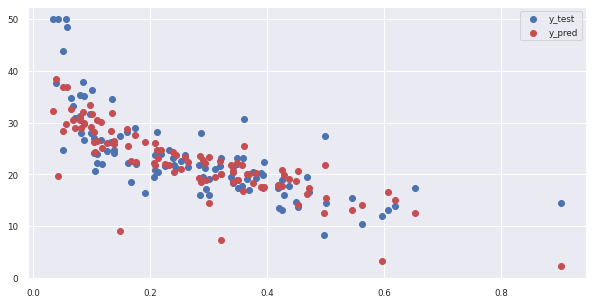

In [17]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label="y_pred")
plt.legend(loc="best")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f"%train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train MSE: 29.4582
Test MSE: 36.3221


In [21]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1*cross_val_score(lr,x_train,y_train, cv=5, scoring='neg_mean_squared_error')

print("개별 Fold의 MSE :", np.round(mse_scores,4))
print("평균 MSE : %.4f"%np.mean(mse_scores))

개별 Fold의 MSE : [26.6053 28.005  30.0101 29.5513 36.1951]
평균 MSE : 30.0734


In [22]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터셋 :", x_train.shape)
print("2차 다항식 변환 데이터셋 : ", x_train_poly.shape)

원본 학습 데이터셋 : (404, 2)
2차 다항식 변환 데이터셋 :  (404, 6)


In [23]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f"%train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train MSE: 18.8399
Test MSE: 37.8781


1차식일 때보다 MSE가 낮은 것을 보아 더 안정적임을 알 수 있다.

In [24]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train MSE:10.6872
Test MSE: 15331501237722310.0000


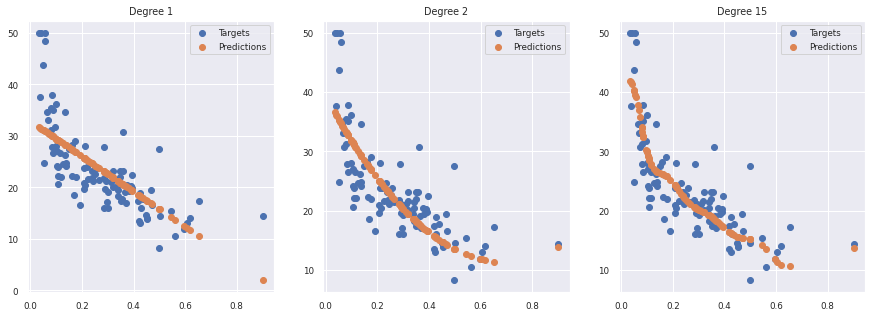

In [25]:
plt.figure(figsize=(15,5))
for n, deg in enumerate([1,2,15]):
    ax1 = plt.subplot(1,3,n+1)

    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['LSTAT']])
    x_test_poly = pf.fit_transform(x_test.loc[:,['LSTAT']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test, label='Targets')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['LSTAT']], y_test_pred, label='Predictions')
    #제목 표시
    plt.title("Degree %d"%deg)
    # 범례 표시
    plt.legend()
plt.show()

### 다항식 차수에 따른 선형 회귀 모델의 LSTAT 피처에 대한 적합도를 산점도로 나타낸다.
### 1차항일 때는 데이터의 곡선 패턴을 설명하기에는 부족해 보인다. 2차항일 때는 데이터에 대한 설명력이 좋아진 것으로 보인다. 15차항일 때는 회귀곡선의 변곡점이 많아져 불안정해 보인다.

***
## L2 / L1 규제
### 모델을 설명하는 각 피처가 모델의 예측 결과에 미치는 영향력을 가중치(회귀계수)로 표현하는데, 이런 가중치들이 커지면 페널티를 부과하여 가중치를 낮은 수준으로 유지한다.

In [26]:
# Ridge (L2 규제)
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)
y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:38.2040
Test MSE:32.0171


In [27]:
# Lasso (L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)

las.fit(x_train_poly, y_train)
y_train_pred = las.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = las.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:34.1689
Test MSE:28.9306


In [28]:
# ElasticNet(L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:35.8150
Test MSE:30.0891
